**Prepare the csv file**

In [1]:
# import some libraires
import pandas as pd
import datetime
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('all.csv',encoding= 'unicode_escape')

In [3]:
df.head()

,Date,tweet
0,1/1/2021 3:33,@VeraVanHorne Many in #Ukraine have high hopes...
1,1/1/2021 4:21,"Last June it was Russia, in August it was Iran..."
2,1/1/2021 6:49,Want to know where oil is heading in 2021? Wh...
3,1/1/2021 8:35,Is #Russia intending to protect #Kurds &amp; t...
4,1/1/2021 10:45,"Happy New Year, friends! Happiness in the New ..."


In [4]:
df['Date'] = pd.to_datetime(df['Date']).dt.date
#df['Date'] = pd.to_datetime(df['Date'] ,errors = 'coerce',format = '%Y-%m-%d').dt.strftime("%Y-%m-%d")

In [5]:
df.shape

(29996, 2)

In [6]:
df.head()

,Date,tweet
0,2021-01-01,@VeraVanHorne Many in #Ukraine have high hopes...
1,2021-01-01,"Last June it was Russia, in August it was Iran..."
2,2021-01-01,Want to know where oil is heading in 2021? Wh...
3,2021-01-01,Is #Russia intending to protect #Kurds &amp; t...
4,2021-01-01,"Happy New Year, friends! Happiness in the New ..."


In [7]:
df.tail()

,Date,tweet
29991,NaT,NaN
29992,NaT,NaN
29993,NaT,NaN
29994,NaT,NaN
29995,NaT,NaN


In [8]:
print('Null Values:',df.isnull().values.sum())
print('If any NA values:', df.isnull().values.any())

Null Values: 12
If any NA values: True


In [9]:
df = df.dropna()

In [10]:
print('Null Values:',df.isnull().values.sum())
print('If any NA values:', df.isnull().values.any())

Null Values: 0
If any NA values: False


In [11]:
df.head()

,Date,tweet
0,2021-01-01,@VeraVanHorne Many in #Ukraine have high hopes...
1,2021-01-01,"Last June it was Russia, in August it was Iran..."
2,2021-01-01,Want to know where oil is heading in 2021? Wh...
3,2021-01-01,Is #Russia intending to protect #Kurds &amp; t...
4,2021-01-01,"Happy New Year, friends! Happiness in the New ..."


In [12]:
df.tail()

,Date,tweet
29985,2022-07-01,The Russian authorities deny: \n striking civ...
29986,2022-07-01,"Welp, we're giving another $820 million to Ukr..."
29987,2022-07-01,The security assistance to Ukraine ???? contin...
29988,2022-07-01,"If Ukraine loses, Ukraine ceases to exist. If..."
29989,2022-07-01,.@POTUS has announced up to $820 million in ad...


In [13]:
df.shape

(29990, 2)

**Start cleaning the tweets**

In [14]:
# Clean the tweets

# Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) # removed @mentions
  text = re.sub(r'#', '', text) # removes the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) # removeRT
  text = re.sub(r'https?:\/\/\S+', '', text) # remove the hyper link

  return text

# cleaning the text
df['tweet'] = df['tweet'].apply(cleanTxt)

In [15]:
# show the cleaned text
df.head()

,Date,tweet
0,2021-01-01,Many in Ukraine have high hopes that Ukraine ...
1,2021-01-01,"Last June it was Russia, in August it was Iran..."
2,2021-01-01,Want to know where oil is heading in 2021? Wh...
3,2021-01-01,Is Russia intending to protect Kurds &amp; the...
4,2021-01-01,"Happy New Year, friends! Happiness in the New ..."


In [16]:
# Create a function to get the subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# create two new columns
df['Subjectivity'] = df['tweet'].apply(getSubjectivity)
df['Polarity'] = df['tweet'].apply(getPolarity)

In [17]:
# Show new data frame with new columns
df.head()

,Date,tweet,Subjectivity,Polarity
0,2021-01-01,Many in Ukraine have high hopes that Ukraine ...,0.517500,-0.005000
1,2021-01-01,"Last June it was Russia, in August it was Iran...",0.533333,-0.179167
2,2021-01-01,Want to know where oil is heading in 2021? Wh...,0.200000,0.200000
3,2021-01-01,Is Russia intending to protect Kurds &amp; the...,0.375000,-0.125000
4,2021-01-01,"Happy New Year, friends! Happiness in the New ...",0.476705,0.347159


In [18]:
print('Null Values:',df.isnull().values.sum())
print('If any NA values:', df.isnull().values.any())

Null Values: 0
If any NA values: False


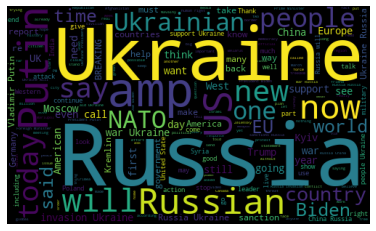

In [19]:
# Next, let see how well the senitments are distributed 
# lets do so by plotting wordcloud or textcloud, which is a visualizing techniqe
# where the more often a word is appearing in a text, the bigger in size it would be

# Plot The word cloud

allWords = ' '.join( [twts for twts in df['tweet']] )
wordcloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [23]:
# create a function to computer the negative, neutral and positive analysis
def getAnalysis(score):
  if score <0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)

# show the data frame
df.head()


,Date,tweet,Subjectivity,Polarity,Analysis
0,2021-01-01,Many in Ukraine have high hopes that Ukraine ...,0.517500,-0.005000,Negative
1,2021-01-01,"Last June it was Russia, in August it was Iran...",0.533333,-0.179167,Negative
2,2021-01-01,Want to know where oil is heading in 2021? Wh...,0.200000,0.200000,Positive
3,2021-01-01,Is Russia intending to protect Kurds &amp; the...,0.375000,-0.125000,Negative
4,2021-01-01,"Happy New Year, friends! Happiness in the New ...",0.476705,0.347159,Positive


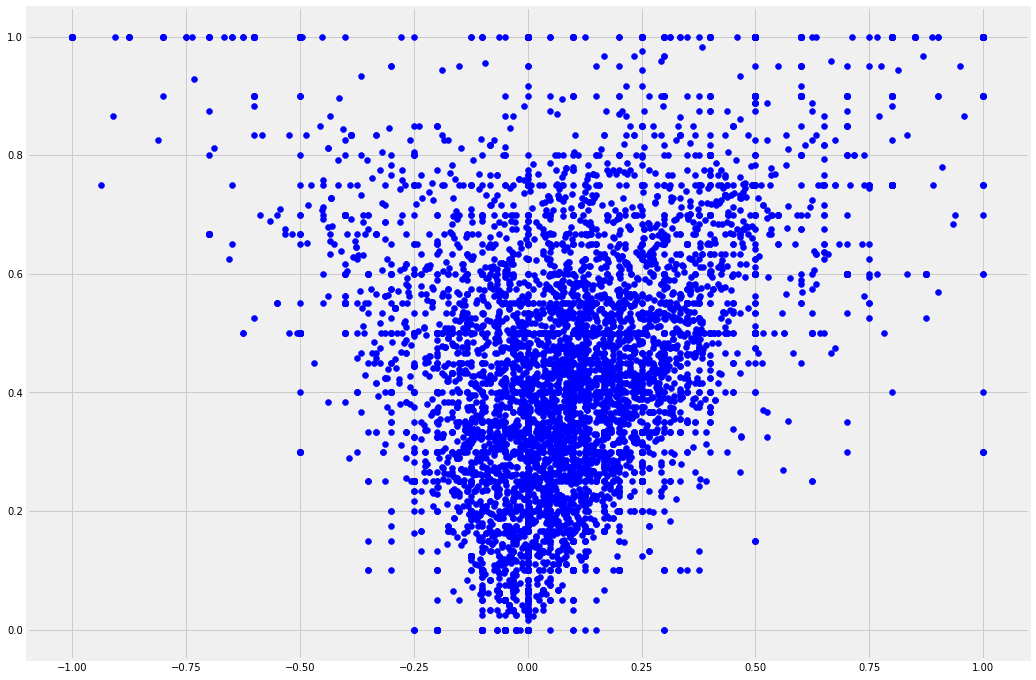

In [22]:
# Plot the Polarity and Subjectivity
plt.figure(figsize = (32,24))
for i in range(0,df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show

In [24]:
# get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets  = ptweets['tweet']
round(ptweets.shape[0]/ df.shape[0] *100, 1)

45.0

In [25]:
# get the percentage of Negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets  = ntweets['tweet']
round(ntweets.shape[0]/ df.shape[0] *100, 1)

26.6

In [27]:
# get the percentage of Neutral tweets
neutraltweets = df[df.Analysis == 'Neutral']
neutraltweets  = neutraltweets['tweet']
round(neutraltweets.shape[0]/ df.shape[0] *100, 1)

28.5

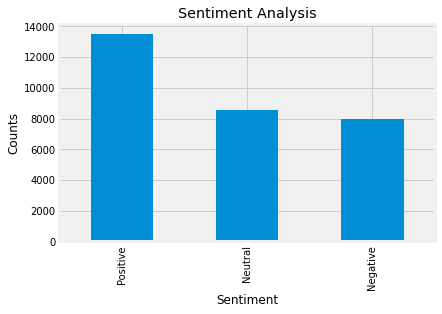

In [29]:
# show the value count 
df['Analysis'].value_counts()

# plot to visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()